# Chapter 1: GemPy Basic

In this first example, we will show how to construct a first basic model and the main objects and functions. First we import gempy:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


All data get stored in a python object InputData.  This object can be easily stored in a Python pickle. However, these files have the limitation that all dependecies must have the same versions as those when the pickle were created. For these reason to have more stable tutorials we will generate the InputData from raw data---i.e. csv files exported from Geomodeller.

These csv files can be found in the input_data folder in the root folder of GemPy. These tables contains uniquely the XYZ (and poles, azimuth and polarity in the foliation case) as well as their respective formation name (but not necessary the formation order).


In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 60,60,60],
                         path_o = os.pardir+"/input_data/FabLessPoints_Foliations.csv",
                         path_i = os.pardir+"/input_data/FabLessPoints_Points.csv")

In [3]:
geo_data.interfaces.tail()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
14,900.0,1000.0,-650.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},2}$",5
15,600.0,1000.0,-550.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},3}$",5
16,1300.0,1000.0,-600.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},4}$",5
18,1900.0,1000.0,-800.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},5}$",5
39,0.0,0.0,-2000.0,basement,Default series,6,1,False,"${\bf{x}}_{\alpha \,{\bf{6}},0}$",6


In [4]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest": ('SecondaryReservoir','Seal', 'Reservoir', 'Overlying'), 
                               },
                       order_series = ["fault", 'Rest'],
                       order_formations=['MainFault', 
                                         'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
                                         ]) 


In [5]:
geo_data.interfaces.tail()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
31,1600.0,1000.0,-1500.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},4}$",5
32,1750.0,1000.0,-1550.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},5}$",5
33,1000.0,1000.0,-1300.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},6}$",5
28,2000.0,1000.0,-1575.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},7}$",5
39,0.0,0.0,-2000.0,basement,Rest,6,2,False,"${\bf{x}}_{\alpha \,{\bf{6}},0}$",6


In [6]:
gp.get_series(geo_data)

,fault,Rest
0,MainFault,SecondaryReservoir
1,NaN,Seal
2,NaN,Reservoir
3,NaN,Overlying
4,NaN,basement


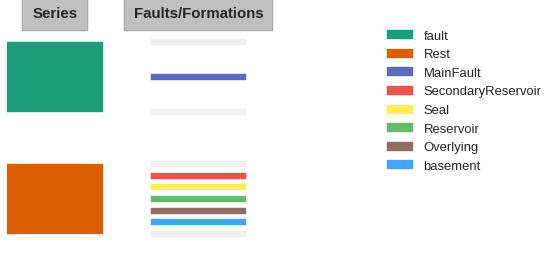

In [7]:
gp.get_sequential_pile(geo_data)

../../gempy/gempy_front.py:927: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead", FutureWarning)


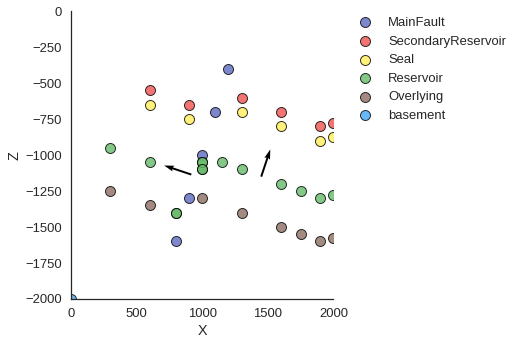

In [8]:
gp.plot_data(geo_data)

In [9]:
gp.plot_data_3D(geo_data)

../../gempy/gempy_front.py:1016: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


closing vtk


In [10]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True, u_grade=[0,1])

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [48]:
sol = gp.compute_model(interp_data)

In [49]:
fault_block = sol[1][0].reshape(60,60,60)

<IPython.core.display.Javascript object>


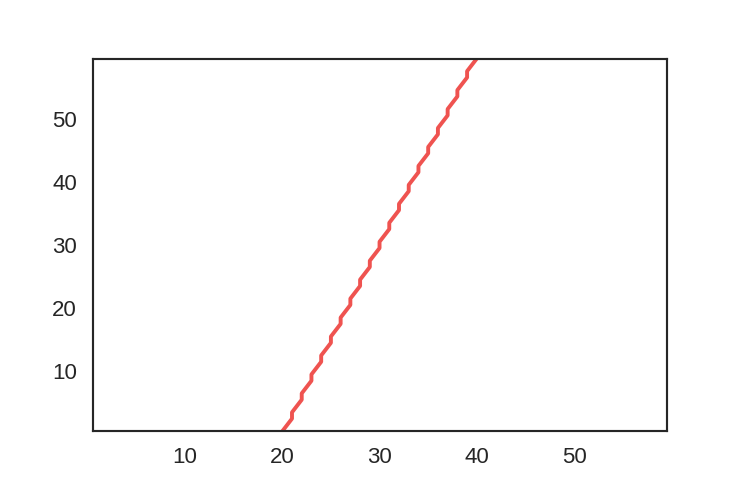

In [51]:
import matplotlib.pyplot as plt
plt.contour(fault_block[:,30,:].T, 1, origin='lower',
           cmap=gp.plotting.colors.cmap,
            norm=gp.plotting.colors.norm)

In [15]:
interf=gp.utils.find_interfaces_from_block(sol[1][0].reshape(60,60,60), 1)

In [16]:
fault_block[interf] = 10

<IPython.core.display.Javascript object>


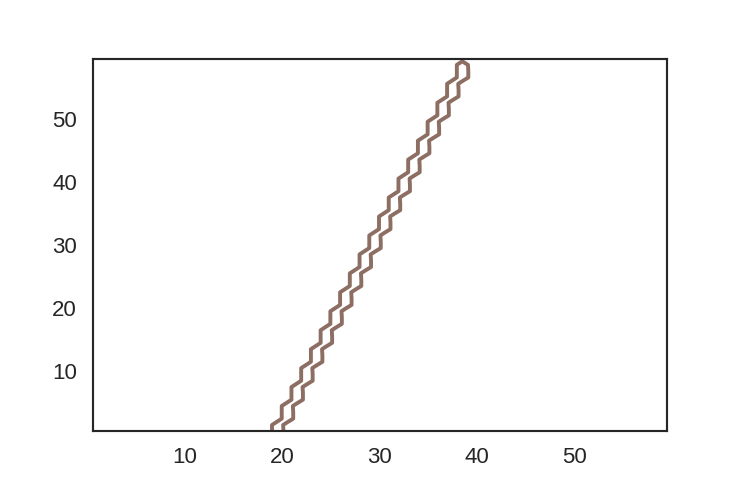

In [47]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.contour(fault_block[:,30,:].T, 1, origin='lower',
           cmap=gp.plotting.colors.cmap,
            norm=gp.plotting.colors.norm)

In [37]:
lith_block = sol[0][0].reshape(60,60,60)
#lith_block[interf] = 15

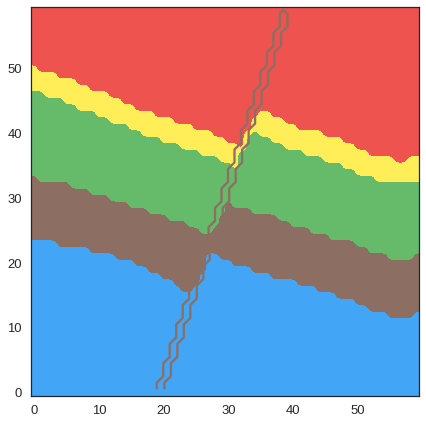

In [44]:
import matplotlib.pyplot as plt
plt.contour(np.round(fault_block[:,30,:]).T, 1, origin='lower',
           cmap=gp.plotting.colors.cmap,
            norm=gp.plotting.colors.norm)

import matplotlib.pyplot as plt
plt.imshow(np.round(lith_block[:,30,:]).T, origin='bottom',
           cmap=gp.plotting.colors.cmap,
            norm=gp.plotting.colors.norm, interpolation='quadric')

../../gempy/gempy_front.py:953: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


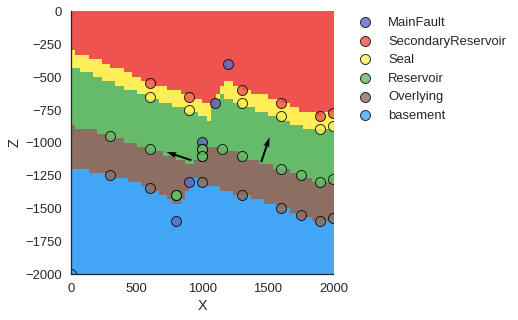

In [23]:
gp.plot_section(geo_data, sol[0][0], 30, plot_data=True)

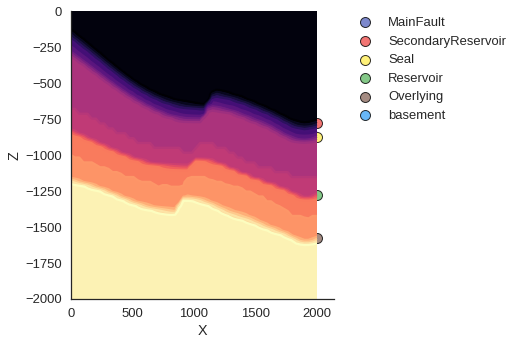

In [27]:
gp.plot_scalar_field(geo_data, sol[0][0], 30)

In [29]:
ver, sim = gp.get_surfaces(interp_data, sol[0][1], sol[1][1])

In [30]:
gp.plot_surfaces_3D(geo_data, ver, sim)